In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import altair as alt
import matplotlib.pyplot as plt
import time

In [7]:
start_time = time.time()
# t-SNE on mfeat dataset

df = pd.read_csv("mfeat.csv") 
df
initial_list = df.to_numpy()

selected_columns = df[df.columns[0:63]]

new_df = selected_columns.copy()

list = new_df.to_numpy()

list_embedded = TSNE(n_components=2, learning_rate='auto',
                   init='random').fit_transform(list)

a= pd.DataFrame(data = list_embedded
             , columns = ['component 1', 'component 2'])
 
embedded_df = a.reset_index().merge(df.reset_index(), left_index=True, right_index=True, how='left')


alt.Chart(embedded_df).mark_point(filled=True).encode(
           x = 'component 1',
           y = 'component 2',
           color=alt.Color('Cluster'),
           tooltip = [
               alt.Tooltip('Cluster')
              ]).interactive()

alt.Chart(...)

In [8]:
end_time = time.time()
print('Time for t-SNE mfeat is: {}'.format( end_time - start_time))

Time for t-SNE mfeat is: 20.01310396194458


In [9]:
from IPython.core.display import Image
import numpy as np
import sklearn.datasets

!pip install umap-learn 

from IPython.core.display import Image
import numpy as np
import sklearn.datasets
!pip install umap-learn[plot]

import umap.plot

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


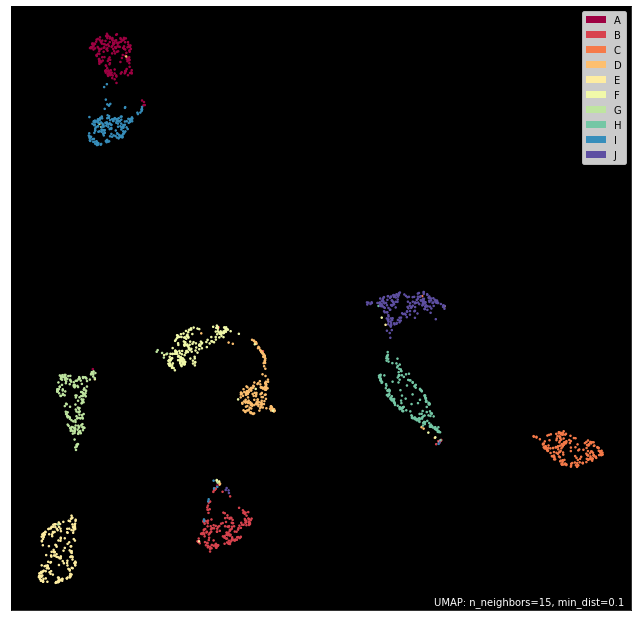

In [10]:
start_time_2 = time.time()
mapper = umap.UMAP().fit(list.data)
umap.plot.points(mapper, labels=df.Cluster,background='black')

In [11]:
end_time_2 = time.time()
print('Time for umap mfeat is: {}'.format( end_time_2 - start_time_2))

Time for umap mfeat is: 38.499839544296265
